## Smart Agent Recruitment Challenge

FinMan is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across India. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.


## Overview of FinMan On-boarding process
The Managers at FinMan are primarily responsible for recruiting agents. Once a manager has identified a potential applicant, the would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to FinMan to become an agent. This date is known as application_receipt_date.

In the next 3 months, this potential agent has to undergo a 7 day training at the FinMan branch (about Sales processes and various products) and clear a subsequent examination in order to become a FinMan agent.


## The problem - Who are the best agents?
 As is obvious in the above process, there is a significant investment which FinMan makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business.

 Finman has approached you and asked you to to predict the target variable for each potential agent, which would help them identify the right agents to hire.

## Evaluation
Your model's performance would be evaluated based on roc_auc score.



## Public and Private Split
Test Data is further divided into Public and Private set.
Public leaderboard is based on First 2 months of the test dataset (02-Jul-2008 and 01-Sep-2008) and rest of test dataset is used for Private leaderboard.


Data Defination

    ID	-	Unique Application ID
    Office_PIN	-	PINCODE of Fintro's Offices
    Application_Receipt_Date	-	Date of Application
    Applicant_City_PIN	-	PINCODE of Applicant Address
    Applicant_Gender	-	Applicant's Gender
    Applicant_BirthDate	-	Applicant's Birthdate
    Applicant_Marital_Status	-	Applicant's Marital Status
    Applicant_Occupation	-	Applicant's Occupation
    Applicant_Qualification	-	Applicant's Educational Qualification
    Manager_DOJ	-	Manager's Date of Joining
    Manager_Joining_Designation	-	Manager's Joining Designation in Fintro
    Manager_Current_Designation	-	Manager's Designation at the time of application sourcing
    Manager_Grade	-	Manager's Grade in Fintro
    Manager_Status	-	Current Employment Status (Probation / Confirmation)
    Manager_Gender	-	Manager's Gender
    Manager_DoB	-	Manager's Birthdate
    Manager_Num_Application	-	No. of Applications sourced in last 3 months by the Manager
    Manager_Num_Coded	-	No. of agents recruited by the manager in last 3 months
    Manager_Business	-	Amount of business sourced by the manager in last 3 months
    Manager_Num_Products	-	Number of products sold by the manager in last 3 months
    Manager_Business2	-	Amount of business sourced by the manager in last 3 months excluding business from their Category A advisor
    Manager_Num_Products2	-	Number of products sold by the manager in last 3 months excluding business from their Category A advisor
    Business_Sourced(Target)	-	Business sourced by applicant within 3 months [1/0] of recruitment


In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse

In [153]:
data = pd.read_csv("train_r7VTVyN_HtFA0Cn.csv")
data_test = pd.read_csv("test_ZkjAHF8_g6hTr3z.csv")

In [3]:
data_test.shape

(5045, 22)

In [72]:
pd.set_option("display.max_columns", 500)

In [5]:
data_test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,Level 1,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,Level 1,Level 1,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,Level 2,Level 2,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


In [6]:
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [7]:
data.shape

(9527, 23)

In [8]:
data.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [9]:
data_test.shape

(5045, 22)

In [10]:
data_test.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [11]:
data.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [12]:
data.nunique()

ID                             9527
Office_PIN                       98
Application_Receipt_Date        357
Applicant_City_PIN             2979
Applicant_Gender                  2
Applicant_BirthDate            5836
Applicant_Marital_Status          4
Applicant_Occupation              5
Applicant_Qualification          11
Manager_DOJ                     646
Manager_Joining_Designation       8
Manager_Current_Designation       5
Manager_Grade                    10
Manager_Status                    2
Manager_Gender                    2
Manager_DoB                    1245
Manager_Num_Application          17
Manager_Num_Coded                10
Manager_Business               3747
Manager_Num_Products             57
Manager_Business2              3743
Manager_Num_Products2            57
Business_Sourced                  2
dtype: int64

array([[<AxesSubplot:title={'center':'Office_PIN'}>,
        <AxesSubplot:title={'center':'Applicant_City_PIN'}>,
        <AxesSubplot:title={'center':'Manager_Grade'}>],
       [<AxesSubplot:title={'center':'Manager_Num_Application'}>,
        <AxesSubplot:title={'center':'Manager_Num_Coded'}>,
        <AxesSubplot:title={'center':'Manager_Business'}>],
       [<AxesSubplot:title={'center':'Manager_Num_Products'}>,
        <AxesSubplot:title={'center':'Manager_Business2'}>,
        <AxesSubplot:title={'center':'Manager_Num_Products2'}>],
       [<AxesSubplot:title={'center':'Business_Sourced'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

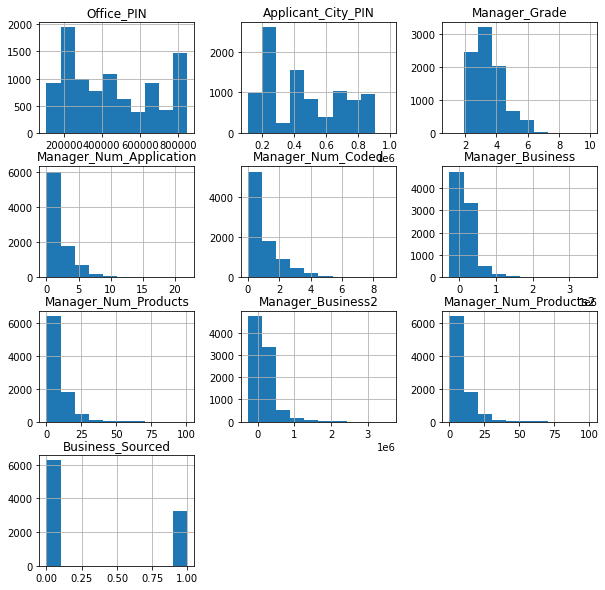

In [13]:
data.hist(figsize=(10,10))


In [14]:
data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [18]:
data_missing = data[data.Manager_DOJ.isna()]

In [36]:
data_notmissing = data

In [37]:
data_notmissing.drop(data_missing.index, inplace=True)

In [38]:
data_missing.shape, data_notmissing.shape, data.shape

((683, 23), (8844, 23), (8844, 23))

## Data_NotMissing

In [40]:
data_notmissing.isna().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               80
Applicant_Gender                 53
Applicant_BirthDate              59
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_DOJ                       0
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_DoB                       0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [45]:
data_notmissing.Applicant_Occupation.value_counts()

Salaried         3546
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64

# Reduce Dimensionality of Data

## <b>High Correlation Filter</b>

In [154]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
Office_PIN,NaN,0.977756,0.077063,0.061672,0.066030,0.093603,0.132186,0.093386,0.131747,0.027682
Applicant_City_PIN,NaN,NaN,0.091697,0.055152,0.060603,0.089794,0.131358,0.089425,0.130928,0.028036
Manager_Grade,NaN,NaN,NaN,0.022524,0.002833,0.322211,0.210353,0.320644,0.209886,0.059363
Manager_Num_Application,NaN,NaN,NaN,NaN,0.514299,0.014605,0.030293,0.015871,0.029977,0.037593
Manager_Num_Coded,NaN,NaN,NaN,NaN,NaN,0.152858,0.129490,0.155289,0.130039,0.013565
Manager_Business,NaN,NaN,NaN,NaN,NaN,NaN,0.733880,0.994422,0.729147,0.031578
Manager_Num_Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.736272,0.998893,0.011000
Manager_Business2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735594,0.031093
Manager_Num_Products2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011706
Business_Sourced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
to_drop = [columns for columns in upper.columns if any(upper[columns] > 0.9)]
to_drop

['Applicant_City_PIN', 'Manager_Business2', 'Manager_Num_Products2']

In [156]:
# Lets drop these columns as they are highly coorelated.
updated_data = data.drop(data[to_drop], axis=1)
updated_data_test = data_test.drop(data_test[to_drop], axis=1)


In [157]:
updated_data.shape, data.shape, updated_data_test.shape, data_test.shape

((9527, 20), (9527, 23), (5045, 19), (5045, 22))

In [158]:
nullvals = pd.DataFrame(
    {
        "Train_data": updated_data.isna().sum(),
        "Test_data": updated_data_test.isna().sum()
    }
)

nullvals


,Train_data,Test_data
Applicant_BirthDate,73,23.0
Applicant_Gender,67,22.0
Applicant_Marital_Status,73,30.0
Applicant_Occupation,1221,1004.0
Applicant_Qualification,86,44.0
Application_Receipt_Date,0,0.0
Business_Sourced,0,NaN
ID,0,0.0
Manager_Business,683,824.0
Manager_Current_Designation,683,824.0


## Steps:
- Analyze the not missing data first
- extract age of agents
- where occupation is null, set as "not employeed"
- apply a random forest and see if city pin is relevant. Mabe drop it. impute using mode
- Impute gender using mode
- extract age from birthdate and drop the column
- impute Marital status with mode
- Application qualification, impute with mode. Set values of MBA and above as Post Graduate

In [159]:
updated_data.Applicant_Gender.value_counts()

M    7179
F    2281
Name: Applicant_Gender, dtype: int64

In [160]:
# Fill missing gender value with Mode
updated_data.Applicant_Gender.fillna(updated_data.Applicant_Gender.mode()[0], inplace=True)

In [161]:
updated_data_test.Applicant_Gender.fillna(updated_data_test.Applicant_Gender.mode()[0], inplace=True)

In [162]:
updated_data.Applicant_Marital_Status.value_counts()

M    6177
S    3267
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

In [163]:
updated_data.Applicant_Marital_Status.fillna(updated_data.Applicant_Marital_Status.mode()[0], inplace=True)
updated_data_test.Applicant_Marital_Status.fillna(updated_data_test.Applicant_Marital_Status.mode()[0], inplace=True)


In [164]:
updated_data.Applicant_Marital_Status.isna().sum()

0

In [165]:
# Map W and D to other as there are very less instances
other_cat = {"W": "O", "D": "O", "M":"M", "S":"S"}

In [166]:
updated_data.Applicant_Marital_Status.value_counts()

M    6250
S    3267
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

In [167]:
updated_data.Applicant_Marital_Status = updated_data.Applicant_Marital_Status.map(other_cat)
updated_data_test.Applicant_Marital_Status = updated_data_test.Applicant_Marital_Status.map(other_cat)


In [196]:
nullvals = pd.DataFrame(
    {
        "Train_data": updated_data.isna().sum(),
        "Test_data": updated_data_test.isna().sum()
    }
)

nullvals


,Train_data,Test_data
Applicant_BirthDate,73,23.0
Applicant_Gender,0,0.0
Applicant_Marital_Status,0,0.0
Applicant_Occupation,0,0.0
Applicant_Qualification,0,1.0
Application_Receipt_Date,0,0.0
Business_Sourced,0,NaN
ID,0,0.0
Manager_Business,683,824.0
Manager_Current_Designation,683,824.0


In [169]:
# Replace by mode
updated_data.Applicant_Qualification.value_counts()

Class XII                                                           5806
Graduate                                                            3196
Class X                                                              225
Others                                                               132
Masters of Business Administration                                    74
Associate / Fellow of Institute of Chartered Accountans of India       3
Associate/Fellow of Institute of Company Secretories of India          1
Certified Associateship of Indian Institute of Bankers                 1
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Acturial Society of India                          1
Professional Qualification in Marketing                                1
Name: Applicant_Qualification, dtype: int64

In [200]:
updated_data.Applicant_Qualification.fillna(updated_data.Applicant_Qualification.mode()[0], inplace=True) 
updated_data_test.Applicant_Qualification.fillna(updated_data_test.Applicant_Qualification.mode()[0], inplace=True) 


In [170]:
updated_data_test.Applicant_Qualification.value_counts()

Graduate                                                                              3375
Class XII                                                                             1357
Others                                                                                 171
Masters of Business Administration                                                      71
Class X                                                                                 19
Professional Qualification in Marketing                                                  5
Associate / Fellow of Institute of Chartered Accountans of India                         2
Associate/Fellow of Institute of Institute of Costs and Works Accountants of India       1
Name: Applicant_Qualification, dtype: int64

In [175]:
#decreasing the number of categories
graduate_mapping = {"Class XII": "Class XII", "Graduate": "Graduate", "Class X":"Class X", "Others": "Others", "Masters of Business Administration":"PostGrad", "Associate / Fellow of Institute of Chartered Accountans of India":"PostGrad", "Associate/Fellow of Institute of Company Secretories of India":"PostGrad", "Certified Associateship of Indian Institute of Bankers": "PostGrad", "Associate/Fellow of Insurance Institute of India": "PostGrad", "Associate/Fellow of Acturial Society of India":"PostGrad", "Professional Qualification in Marketing": "PostGrad"}

In [183]:
updated_data.Applicant_Qualification = updated_data.Applicant_Qualification.map(graduate_mapping)
updated_data_test.Applicant_Qualification = updated_data_test.Applicant_Qualification.map(graduate_mapping)


In [185]:
updated_data.Applicant_Qualification.value_counts()

Class XII    5892
Graduate     3196
Class X       225
Others        132
PostGrad       82
Name: Applicant_Qualification, dtype: int64

In [188]:
# Applicant Occupation

updated_data.Applicant_Occupation.value_counts()

Salaried         3787
Business         2303
Others           1966
Self Employed     149
Student           101
Name: Applicant_Occupation, dtype: int64

In [189]:
# Applicant Occupation

updated_data_test.Applicant_Occupation.value_counts()

Salaried         2560
Business          646
Others            506
Self Employed     310
Student            19
Name: Applicant_Occupation, dtype: int64

In [197]:
updated_data.Applicant_Occupation.fillna("Unknown", inplace=True)
updated_data_test.Applicant_Occupation.fillna("Unknown", inplace=True)


In [199]:
updated_data_test.Applicant_Occupation.isna().sum()

0

In [290]:
# Find the age of applicant and managers.
updated_data.Applicant_BirthDate = pd.to_datetime(updated_data.Applicant_BirthDate)
updated_data_test.Applicant_BirthDate = pd.to_datetime(updated_data_test.Applicant_BirthDate)

updated_data.Manager_DoB = pd.to_datetime(updated_data.Manager_DoB)
updated_data_test.Manager_DoB = pd.to_datetime(updated_data_test.Manager_DoB)

updated_data.Manager_DOJ = pd.to_datetime(updated_data.Manager_DOJ)
updated_data_test.Manager_DOJ = pd.to_datetime(updated_data_test.Manager_DOJ)

updated_data.Application_Receipt_Date = pd.to_datetime(updated_data.Application_Receipt_Date)
updated_data_test.Application_Receipt_Date = pd.to_datetime(updated_data_test.Application_Receipt_Date)


In [292]:
#Update Data

def timestamp_functions(df):
    df["Applicant_Age"] = (df.Application_Receipt_Date.dt.year - df.Applicant_BirthDate.dt.year) - ((df.Application_Receipt_Date.dt.month - df.Applicant_BirthDate.dt.month) < 0)
    df["Manager_Age"] = (df.Application_Receipt_Date.dt.year - df.Manager_DoB.dt.year) - ((df.Application_Receipt_Date.dt.month - df.Manager_DoB.dt.month) < 0)
    df["Manager_Tenure"] = (df.Application_Receipt_Date.dt.year - df.Manager_DOJ.dt.year) * 12 + ((df.Application_Receipt_Date.dt.month - df.Manager_DOJ.dt.month))
    df["Application_Receipt_Month"] = df.Application_Receipt_Date.dt.month
    df["Application_Receipt_Year"] = df.Application_Receipt_Date.dt.year

In [293]:
timestamp_functions(updated_data_test)
timestamp_functions(updated_data)

 We can now drop Applicant_birthDate, Manager_DOJ, Manager_DoB, Application_Receipt_Date

In [296]:
updated_data_test.drop(['Application_Receipt_Date','Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB'], axis=1, inplace=True)
updated_data.drop(['Application_Receipt_Date','Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB'], axis=1, inplace=True)
#'Application_Receipt_Date','Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB'

In [305]:
nullvals = pd.DataFrame(
    {
        "Train_data": updated_data.isna().sum(),
        "Test_data": updated_data_test.isna().sum()
    }
)

nullvals


,Train_data,Test_data
Applicant_Age,0,0.0
Applicant_Gender,0,0.0
Applicant_Marital_Status,0,0.0
Applicant_Occupation,0,0.0
Applicant_Qualification,0,0.0
Application_Receipt_Month,0,0.0
Application_Receipt_Year,0,0.0
Business_Sourced,0,NaN
ID,0,0.0
Manager_Age,683,824.0


In [304]:
updated_data.Applicant_Age.fillna(updated_data.Applicant_Age.mean(), inplace=True) 
updated_data_test.Applicant_Age.fillna(updated_data_test.Applicant_Age.mean(), inplace=True) 


In [ ]:
updated_data.to_csv("updated_data.csv", index=False)
updated_data_test.to_csv("updated_data_test.csv", index=False)

In [63]:
data_encoded_clean = pd.read_csv("updated_data.csv")
data_encoded_clean_test = pd.read_csv("updated_data_test.csv")


In [64]:
data_encoded_clean.head()

,ID,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Applicant_Age,Manager_Age,Manager_Tenure,Application_Receipt_Month,Application_Receipt_Year
0,FIN1000001,842001,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,0,35.0,29.0,17.0,4,2007
1,FIN1000002,842001,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,1,24.0,29.0,17.0,4,2007
2,FIN1000003,800001,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,0,41.0,38.0,11.0,4,2007
3,FIN1000004,814112,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,0,19.0,28.0,44.0,4,2007
4,FIN1000005,814112,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,0,21.0,36.0,11.0,4,2007


In [65]:
designation_map = {
    "Level 1": 1,
    "Level 2": 2,
    "Level 3": 3,
    "Level 4": 4,
    "Level 5": 5,
    "Level 6": 6,
    "Level 7": 7,
    "Other" : 0


}

In [66]:
data_encoded_clean.Manager_Joining_Designation = data_encoded_clean.Manager_Joining_Designation.map(designation_map)
data_encoded_clean_test.Manager_Joining_Designation = data_encoded_clean_test.Manager_Joining_Designation.map(designation_map)

In [67]:
data_encoded_clean.Manager_Current_Designation = data_encoded_clean.Manager_Current_Designation.map(designation_map)
data_encoded_clean_test.Manager_Current_Designation = data_encoded_clean_test.Manager_Current_Designation.map(designation_map)

In [68]:
data_encoded_clean.to_csv("updated_data.csv", index=False)
data_encoded_clean_test.to_csv("updated_data_test.csv", index=False)

## Data Cleaning process is complete. Now, we can build models

In [38]:
data_cleaned = pd.read_csv("updated_data.csv")
data_test_cleaned = pd.read_csv("updated_data_test.csv")


In [40]:
# data_all_columns.Manager_Joining_Designation = np.sqrt(data_all_columns.Manager_Joining_Designation)
# data_all_columns.Manager_Business = np.cbrt(data_all_columns.Manager_Business)

# data_all_columns.Manager_Num_Application = np.sqrt(data_all_columns.Manager_Num_Application)
# data_all_columns.Manager_Num_Coded = np.sqrt(data_all_columns.Manager_Num_Coded)
# data_all_columns.Manager_Num_Products = np.cbrt(data_all_columns.Manager_Num_Products)
# data_all_columns.Applicant_Age = np.sqrt(data_all_columns.Applicant_Age)
# data_all_columns.Manager_Tenure = np.sqrt(data_all_columns.Manager_Tenure)

In [90]:
data_missing_manager_test_pred = data_test_cleaned[data_test_cleaned.Manager_Current_Designation.isna()]
data_all_columns_test_pred = data_test_cleaned[data_test_cleaned.Manager_Current_Designation.notna()]

In [91]:
data_all_columns_test_pred["Business_Sourced"] = Pred_PartPCA

<ipython-input-91-fc4435c54039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all_columns_test_pred["Business_Sourced"] = Pred_PartPCA


In [92]:
data_missing_manager_test_pred["Business_Sourced"] = Pred_part2

<ipython-input-92-7e444ec44401>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_manager_test_pred["Business_Sourced"] = Pred_part2


In [93]:
data_missing_manager_test_pred.head()

,ID,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,...,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Applicant_Age,Manager_Age,Manager_Tenure,Application_Receipt_Month,Application_Receipt_Year,Business_Sourced
2,FIN1009530,800001,M,S,Unknown,Graduate,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,NaN,7,2008,0
3,FIN1009531,800001,M,S,Salaried,Graduate,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,37.0,NaN,NaN,7,2008,0
11,FIN1009539,400075,F,S,Unknown,Graduate,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,32.0,NaN,NaN,7,2008,0
15,FIN1009543,431001,F,S,Salaried,Graduate,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,7,2008,1
17,FIN1009545,431001,M,M,Unknown,Graduate,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36.0,NaN,NaN,7,2008,1


In [112]:
data_all_columns_test_pred.head()

,ID,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Applicant_Age,Manager_Age,Manager_Tenure,Application_Receipt_Month,Application_Receipt_Year,Predictions
0,FIN1009528,284001,M,S,Salaried,Graduate,1.0,1.0,2.0,Probation,F,1.0,0.0,0.0,0.0,25.0,29.0,2.0,7,2008,0
1,FIN1009529,800001,M,M,Salaried,Graduate,1.0,1.0,2.0,Probation,M,2.0,0.0,0.0,0.0,40.0,37.0,1.0,7,2008,1
4,FIN1009532,533101,M,S,Unknown,PostGrad,2.0,2.0,3.0,Confirmation,M,4.0,1.0,97352.0,3.0,30.0,31.0,7.0,7,2008,0
5,FIN1009533,533101,M,S,Unknown,Class XII,2.0,2.0,3.0,Probation,M,5.0,2.0,150721.0,4.0,25.0,30.0,5.0,7,2008,0
6,FIN1009534,533101,M,M,Unknown,Graduate,2.0,2.0,3.0,Confirmation,M,6.0,0.0,80245.0,3.0,43.0,30.0,9.0,7,2008,0


In [41]:
data_missing_manager = data_cleaned[data_cleaned.Manager_Current_Designation.isna()]

In [42]:
data_all_columns = data_cleaned[data_cleaned.Manager_Current_Designation.notna()]

In [43]:
data_missing_manager_test = data_test_cleaned[data_test_cleaned.Manager_Current_Designation.isna()]

In [44]:
data_all_columns_test = data_test_cleaned[data_test_cleaned.Manager_Current_Designation.notna()]

In [45]:
data_all_columns.shape[0] + data_missing_manager.shape[0], data_cleaned.shape

(9527, (9527, 21))

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [47]:
data_all_columns_test.drop("ID", axis=1, inplace=True)

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
data_all_columns.drop("ID", axis=1, inplace=True)

In [49]:
data_all_columns = pd.get_dummies(data_all_columns)

In [50]:
data_all_columns_test = pd.get_dummies(data_all_columns_test)

In [51]:
data_all_columns.shape, data_all_columns_test.shape

((8844, 34), (4221, 33))

## Classification without PCA

In [52]:
from sklearn.utils import resample

# separate minority and majority classes
not_accept = data_all_columns[data_all_columns.Business_Sourced==1]
accept = data_all_columns[data_all_columns.Business_Sourced==0]

# upsample minority
not_accept_upsampled = resample(not_accept,
                          replace=True, # sample with replacement
                          n_samples=len(accept), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
data_all_columns = pd.concat([not_accept_upsampled, accept])

In [53]:
X = data_all_columns.drop('Business_Sourced', axis=1)
y = data_all_columns['Business_Sourced']

In [23]:
X.head()

,Office_PIN,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Applicant_Age,Manager_Age,...,Applicant_Occupation_Unknown,Applicant_Qualification_Class X,Applicant_Qualification_Class XII,Applicant_Qualification_Graduate,Applicant_Qualification_Others,Applicant_Qualification_PostGrad,Manager_Status_Confirmation,Manager_Status_Probation,Manager_Gender_F,Manager_Gender_M
3348,323001,1.0,1.0,2.0,7.0,0.0,10207.0,1.0,34.0,29.0,...,0,0,0,1,0,0,0,1,0,1
5907,841428,1.0,1.0,2.0,2.0,0.0,0.0,0.0,22.0,25.0,...,0,0,0,1,0,0,0,1,0,1
9409,474008,3.0,3.0,4.0,0.0,0.0,0.0,0.0,24.0,31.0,...,0,0,0,1,0,0,0,1,1,0
9473,201301,3.0,3.0,4.0,1.0,0.0,0.0,0.0,27.0,35.0,...,0,0,0,1,0,0,0,1,0,1
5161,476001,1.0,4.0,6.0,1.0,0.0,77956.0,5.0,20.0,43.0,...,0,0,1,0,0,0,1,0,0,1


In [54]:
# Standardise the data
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [55]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)

In [56]:
rf_model = RandomForestClassifier(random_state=167, max_depth=10, n_estimators=100)

In [57]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=167)

In [58]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

In [63]:
Pred_part1 = rf_model.predict(data_all_columns_test)

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
pred_test[1].shape, y_test.shape

((), (2907,))

In [61]:
roc_auc_score(pred_train, y_train), roc_auc_score(pred_test, y_test)

(0.8324196490734896, 0.7210360585958099)

In [66]:
data_all_columns_test_pred["Prediction"] = Pred_part1

<ipython-input-66-4c7ef4d4ad48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all_columns_test_pred["Prediction"] = Pred_part1


In [69]:
data_all_columns_test_pred

(4221, 21)

# Model for data with missing manager

In [71]:
data_missing_manager_1 = data_cleaned.copy()
data_missing_manager_test_1 = data_missing_manager_test.copy()

In [72]:
data_missing_manager_1.head()

,ID,Office_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,...,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Applicant_Age,Manager_Age,Manager_Tenure,Application_Receipt_Month,Application_Receipt_Year
0,FIN1000001,842001,M,M,Others,Graduate,1.0,2.0,3.0,Confirmation,...,2.0,1.0,335249.0,28.0,0,35.0,29.0,17.0,4,2007
1,FIN1000002,842001,M,S,Others,Class XII,1.0,2.0,3.0,Confirmation,...,2.0,1.0,335249.0,28.0,1,24.0,29.0,17.0,4,2007
2,FIN1000003,800001,M,M,Business,Class XII,1.0,1.0,2.0,Confirmation,...,0.0,0.0,357184.0,24.0,0,41.0,38.0,11.0,4,2007
3,FIN1000004,814112,M,S,Salaried,Class XII,1.0,3.0,4.0,Confirmation,...,0.0,0.0,318356.0,22.0,0,19.0,28.0,44.0,4,2007
4,FIN1000005,814112,M,M,Others,Class XII,1.0,1.0,2.0,Confirmation,...,2.0,1.0,230402.0,17.0,0,21.0,36.0,11.0,4,2007


In [73]:
data_missing_manager_1.drop(['Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business', 'Manager_Num_Products', 'Manager_Age', 'Manager_Tenure'], axis=1, inplace=True)

In [74]:
data_missing_manager_test_1.drop(['Manager_Joining_Designation', 'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business', 'Manager_Num_Products', 'Manager_Age', 'Manager_Tenure'], axis=1, inplace=True)

In [75]:
data_missing_manager_1.drop("ID", axis=1, inplace=True)
data_missing_manager_test_1.drop("ID", axis=1, inplace=True)

In [76]:
data_missing_manager_1.shape, data_missing_manager_test_1.shape

((9527, 9), (824, 8))

In [77]:
data_missing_manager_1 = pd.get_dummies(data_missing_manager_1)
data_missing_manager_test_1 = pd.get_dummies(data_missing_manager_test_1)

In [78]:
data_missing_manager_1.shape, data_missing_manager_test_1.shape

((9527, 21), (824, 19))

In [79]:
data_missing_manager_1.drop("Applicant_Occupation_Student", axis=1, inplace=True)

In [80]:
from sklearn.utils import resample

# separate minority and majority classes
not_accept = data_missing_manager_1[data_missing_manager_1.Business_Sourced==1]
accept = data_missing_manager_1[data_missing_manager_1.Business_Sourced==0]

# upsample minority
not_accept_upsampled = resample(not_accept,
                          replace=True, # sample with replacement
                          n_samples=len(accept), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
data_missing_manager_1 = pd.concat([not_accept_upsampled, accept])

In [81]:
X_1 = data_missing_manager_1.drop('Business_Sourced', axis=1)
y_1 = data_missing_manager_1['Business_Sourced']

In [82]:
X_train_1,X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=22)

In [83]:
rf_model_1 = RandomForestClassifier(random_state=167, max_depth=10, n_estimators=100)

In [84]:
rf_model_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=10, random_state=167)

In [85]:
pred_train_1 = rf_model_1.predict(X_train_1)
pred_test_1 = rf_model_1.predict(X_test_1)

In [86]:
Pred_part2 = rf_model_1.predict(data_missing_manager_test_1)

In [87]:
roc_auc_score(pred_train_1, y_train_1), roc_auc_score(pred_test_1, y_test_1)

(0.7645890270636699, 0.6711894254044165)

In [88]:
data_missing_manager_test_pred["Prediction"] = Pred_part2

<ipython-input-88-60bd001c3a14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing_manager_test_pred["Prediction"] = Pred_part2


In [94]:
#data_missing_manager_test_pred
#data_all_columns_test_pred

data_all_columns_test_pred.index.union(data_missing_manager_test_pred.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044],
           dtype='int64', length=5045)

In [95]:
frame = [data_missing_manager_test_pred, data_all_columns_test_pred]
data_all_columns_test_pred_final = pd.concat(frame)

In [96]:
data_all_columns_test_pred_final.sort_index(inplace=True)

In [97]:
data_all_columns_test_pred_final[["ID", "Business_Sourced"]].to_csv("Submitions.csv", index=False)

## After PCA

In [54]:
# Standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [56]:
#Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
pca = PCA().fit(X_train) 

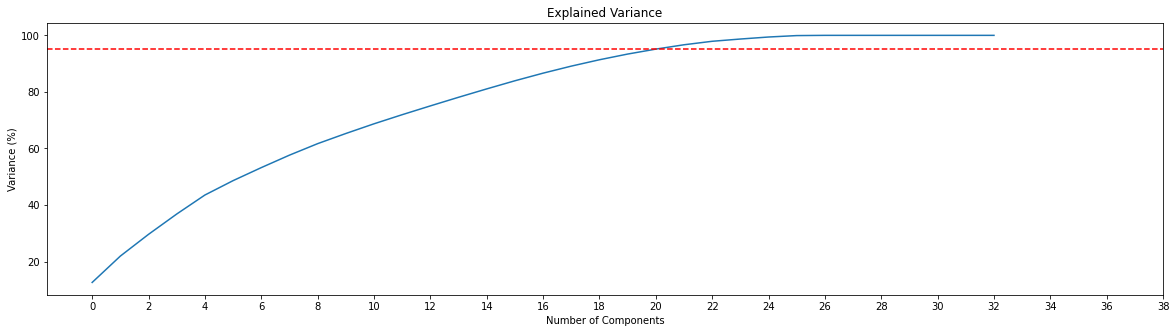

In [57]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(20,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.xticks(np.arange(0, 40, 2))

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [58]:
# selecting only 350 components
pca = PCA(21).fit(X_train)

In [59]:
# transform both training and validation data

pca_training = pca.transform(X_train)
pca_test = pca.transform(X_test)

In [69]:
pca_final = pca.transform(data_all_columns_test)

In [60]:
rf_model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=100)

In [61]:
rf_model.fit(pca_training, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [62]:
pred_train = rf_model.predict(pca_training)
pred_test = rf_model.predict(pca_test)

In [70]:
Pred_PartPCA = rf_model.predict(pca_final)

In [ ]:
from sklearn.metrics import roc_auc_score

In [35]:
#roc_auc_score(pred_train, y_train) 
roc_auc_score(pred_test, y_test)

0.7324193608858117

# FA

In [397]:
# creating the training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 10, test_size = 0.25)

In [398]:
cor = X_train.corr().abs()
cor

s = cor.unstack()
so = s.sort_values(ascending=False)

In [399]:
count = 0
for i in so:
    if(i < 1 and i >= 0.5):
        count = count+1

count

34

In [400]:
# creating the random forest regressor model
model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=100)

In [401]:
from sklearn.decomposition import FactorAnalysis

In [402]:
fa = FactorAnalysis(n_components=17)

In [403]:
X_train_transformed = fa.fit_transform(X_train)
X_valid_transformed = fa.fit_transform(X_valid)

In [404]:
model.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [405]:
pp = model.predict(X_valid_transformed)

In [407]:
roc_auc_score(model.predict(X_valid_transformed), y_valid)

0.5612806120369993